In [1]:
import time, nltk
import pandas as pd
from tqdm import tqdm
from konlpy.tag import Okt
from selenium import webdriver
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings('ignore')

In [2]:
base_url = 'https://entertain.naver.com/'
sub_url = 'now#sid=106&date=2023-04-28&page=1'
url = f'{base_url}{sub_url}'
driver = webdriver.Chrome('C:/Users/yumi5/Downloads/chromedriver')
driver.get(url)
time.sleep(3)

In [3]:
soup = BeautifulSoup(driver.page_source, 'html.parser')
lis = soup.select('ul.news_lst.news_lst2 > li')
len(lis)

25

In [4]:
li = lis[0]

In [5]:
from datetime import datetime
now = datetime.now()
ymd = now.strftime('%Y-%m-%d')
ymd

'2023-05-01'

In [7]:
lines = []

for i in tqdm(range(1, 101)):
    try:
        driver.get(f'{base_url}now#sid=106&date={ymd}&page={i}')
        time.sleep(2)
        soup = BeautifulSoup(driver.page_source, 'html.parser')
        lis = soup.select('ul.news_lst.news_lst2 > li')

        for li in lis:
            title = li.select_one('.tit').get_text().strip()
            lines.append(title)
    except:
        break

 90%|█████████ | 90/100 [03:10<00:21,  2.12s/it]


In [8]:
lines

['스테이씨 시은, 보석같은 미모 [포토엔HD]',
 '“파리알 수백개부터 구더기까지”… 이시언, 호주 워홀로 빌딩 청소하다 ‘경악’ (‘부산촌놈’) [Oh!쎈 리뷰]',
 '스테이씨 세은-시은, 발랄하게 무대 [포토엔HD]',
 '케플러 김채현, 다리부상에 앉아서 무대 참석 [포토엔HD]',
 '박지선 “코로나 이후 ‘부산행’ 좀비 감염 다르게 보여” (씨네마인드2)',
 '엔하이픈 성훈, 사르르 녹아드는 미소 [포토엔HD]',
 '이순재 "\'하이킥\'으로 베트남에서 알아봐…모르는 사람 없어" (마이웨이)[종합]',
 '아이브 장원영, 빗속의 우아한 소녀 [포토엔HD]',
 '배두나, 정재형과 뜻밖의 인연 “우리 어떻게 알아?”',
 '“3개월이면 끝?” 차주영, 안재현♥백진희 위장 결혼 알아채나 (‘진짜가’)[Oh!쎈 종합]',
 '엔하이픈, 패스 더 마이크~ [포토엔HD]',
 '엔하이픈 성훈, 진정한 ‘만찢남’ [포토엔HD]',
 '‘닥터 차정숙’ 민우혁 “배우자 기만은 그만…알면서도 모르는 척 거슬려” 김병철 불륜 경고',
 '엔하이픈 니키, 팬들에게 인사 [포토엔HD]',
 '주호민 “영화 ‘부산행’ 시나리오 다듬는 작업 하루 해” (지선씨네마인드2)',
 '엄정화, 김병철 불륜 의심…명세빈 딸 관계 알았다 (닥터 차정숙)[종합]',
 "블랙핑크 지수, 아이브 제치고 '인기가요' 1위",
 '엄정화, 김병철X명세빈 불륜 의심 시작..민우혁, 고백? “할말 있어” (‘차정숙’)[종합]',
 '‘구해줘! 홈즈’ 장동민 ‘언어유희’에 이은지 ‘빵’ “너네 집은 2층에서 다 ‘보이드’라”',
 "아이콘 바비 '화보 같은 순간'[★포토]",
 '[진짜가 나타났다] “3개월이면 끝?” 산모수첩에 적힌 백진희의 메모를 발견한 차주영...안재현 거짓 부부 들통 위기',
 "아이콘 구준회 '즐거운 무대'[★포토]",
 "'부산촌놈' 허성태, 호주 바리스타 도전…두유 플랫화이트 주문에 당황",
 "'닥터 차정숙' 엄정화, 실력으로 김병철 이겼다..당당 복귀 [★밤T

In [9]:
from PIL import Image 
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [10]:
sw_wc = STOPWORDS

In [11]:
titles = ' '.join(lines)
titles

'스테이씨 시은, 보석같은 미모 [포토엔HD] “파리알 수백개부터 구더기까지”… 이시언, 호주 워홀로 빌딩 청소하다 ‘경악’ (‘부산촌놈’) [Oh!쎈 리뷰] 스테이씨 세은-시은, 발랄하게 무대 [포토엔HD] 케플러 김채현, 다리부상에 앉아서 무대 참석 [포토엔HD] 박지선 “코로나 이후 ‘부산행’ 좀비 감염 다르게 보여” (씨네마인드2) 엔하이픈 성훈, 사르르 녹아드는 미소 [포토엔HD] 이순재 "\'하이킥\'으로 베트남에서 알아봐…모르는 사람 없어" (마이웨이)[종합] 아이브 장원영, 빗속의 우아한 소녀 [포토엔HD] 배두나, 정재형과 뜻밖의 인연 “우리 어떻게 알아?” “3개월이면 끝?” 차주영, 안재현♥백진희 위장 결혼 알아채나 (‘진짜가’)[Oh!쎈 종합] 엔하이픈, 패스 더 마이크~ [포토엔HD] 엔하이픈 성훈, 진정한 ‘만찢남’ [포토엔HD] ‘닥터 차정숙’ 민우혁 “배우자 기만은 그만…알면서도 모르는 척 거슬려” 김병철 불륜 경고 엔하이픈 니키, 팬들에게 인사 [포토엔HD] 주호민 “영화 ‘부산행’ 시나리오 다듬는 작업 하루 해” (지선씨네마인드2) 엄정화, 김병철 불륜 의심…명세빈 딸 관계 알았다 (닥터 차정숙)[종합] 블랙핑크 지수, 아이브 제치고 \'인기가요\' 1위 엄정화, 김병철X명세빈 불륜 의심 시작..민우혁, 고백? “할말 있어” (‘차정숙’)[종합] ‘구해줘! 홈즈’ 장동민 ‘언어유희’에 이은지 ‘빵’ “너네 집은 2층에서 다 ‘보이드’라” 아이콘 바비 \'화보 같은 순간\'[★포토] [진짜가 나타났다] “3개월이면 끝?” 산모수첩에 적힌 백진희의 메모를 발견한 차주영...안재현 거짓 부부 들통 위기 아이콘 구준회 \'즐거운 무대\'[★포토] \'부산촌놈\' 허성태, 호주 바리스타 도전…두유 플랫화이트 주문에 당황 \'닥터 차정숙\' 엄정화, 실력으로 김병철 이겼다..당당 복귀 [★밤TView] 아이브 장원영, 심쿵미모 [포토엔HD] 트와이스 정연 ‘귀여운 청청 매력’[포토엔HD] 아이브 장원영, 예쁨이 넘치는 아우라 [포토엔HD]

In [13]:
okt = Okt()
tokens = okt.nouns(titles)
tokens[:10]

['스테이', '은', '미모', '포토', '파리', '알', '수백', '구더기', '이시언', '호주']

In [21]:
stoptext = """
    포토 HD포토 사진 공개 포토엔HD 종합 리뷰 밤TView 스타 차 진짜
    나 박 김 안 이슈 귀 더 첫 전 속 미소 위 내 새 미모 아이 오늘 마련
    한국 고 사람 것
"""
stop_words = stoptext.split()
new_tokens = [word for word in tokens if word not in stop_words]
new_tokens[:10]

['스테이', '은', '파리', '알', '수백', '구더기', '이시언', '호주', '워홀', '빌딩']

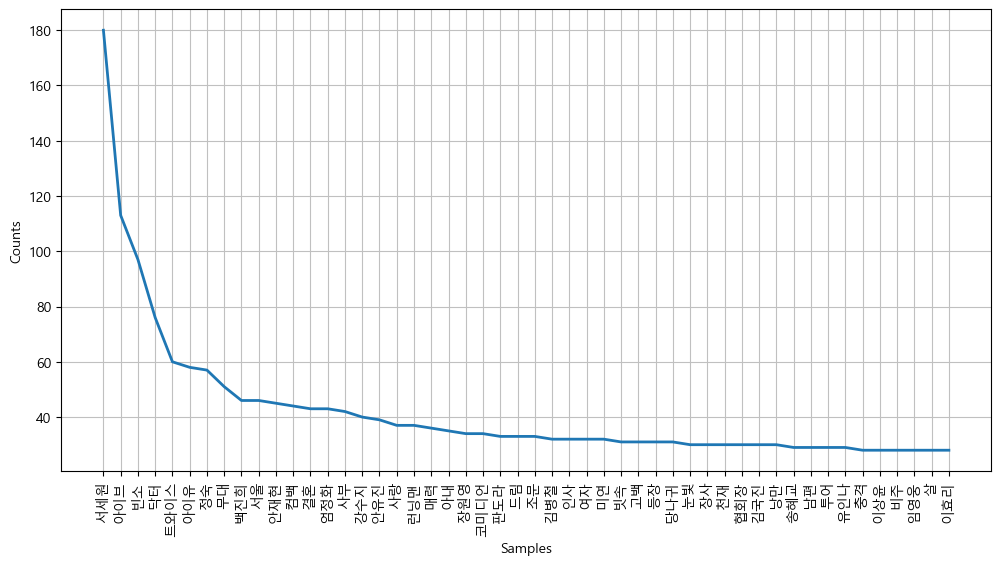

In [22]:
titles = nltk.Text(new_tokens)
plt.figure(figsize=(12,6))
titles.plot(50);

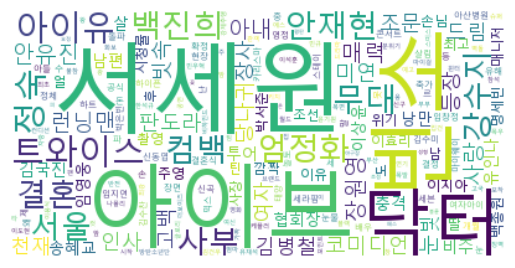

In [28]:
wc = WordCloud(
    background_color='white', random_state=2023,
    font_path='c:/Windows/Fonts/malgun.ttf', relative_scaling=0.2
).generate_from_frequencies(dict(titles.vocab().most_common(300)))

plt.imshow(wc, interpolation='bilinear')
plt.axis('off');